Objetivo específico: Buscar padrões que sejam capazes de caracterizar a criação animal no biotério do ICC;

12) A retirada dos valores discrepantes poderá apresentar uma tendência mais clara e sazonalidade padrozinada da produção de cada linhagem?

Após a análise de série temporal por linhagem de animais produzidos no biotério, a próxima hipótese que surgiu: 
Hipótese: Se retirar os valores discrepantes os dados podem se comportar em uma distribuição normal. 

In [1]:
#Importando as bibliotecas para analise desses dados. 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import quantile
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
#Abrindo uma variável que vai receber e ler com a função .read_csv nossa tabela que será analisada

eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [3]:
#Filtrando coluna com as condições

num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_nasc'] < 200)]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_nasc[c] = pd.to_datetime(num_nasc[c], unit = 's') #indica o formato das datas
    
num_nasc.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [4]:
#Filtrando linhagens a não serem utilizadas
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

tirar_ling = num_nasc[
    (num_nasc['ling'] != ling_ex[0]) &
    (num_nasc['ling'] != ling_ex[1]) &
    (num_nasc['ling'] != ling_ex[2]) &
    (num_nasc['ling'] != ling_ex[3]) &
    (num_nasc['ling'] != ling_ex[4]) &
    (num_nasc['ling'] != ling_ex[5]) &
    (num_nasc['ling'] != ling_ex[6]) &
    (num_nasc['ling'] != ling_ex[7]) &
    (num_nasc['ling'] != ling_ex[8]) &
    (num_nasc['ling'] != ling_ex[9]) &
    (num_nasc['ling'] != ling_ex[10]) &
    (num_nasc['ling'] != ling_ex[11]) &
    (num_nasc['ling'] != ling_ex[12]) &
    (num_nasc['ling'] != ling_ex[13])
]
len(tirar_ling)

1785

A Dataframe é uma forma de organizar os dados como uma tabela, contendo as informações das colunas e cada instância (dado).
Na próxima célula foi criada uma Dataframe (serie_temp_ling) que foi criada para organizar o que for analizado. Para criar essa DataFrame, foi feita a partir de outra (tirar_ling) mantendo as mesmas informações de cada coluna. Tenho como index a coluna 'date_hoje'. As colunas podem estar dispostas em qualquer ordem. Você pode acrescentar apenas o que vai usar.

In [5]:
serie_temp_ling = pd.DataFrame(tirar_ling['date_hoje'])
serie_temp_ling['ling'] = tirar_ling['ling'] #criação da DataFrame "tirar_ling com a coluna de data"
serie_temp_ling['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp_ling = serie_temp_ling.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_temp_ling.head()

,ling,num_nasc
date_hoje,,
2014-09-23 17:40:33,Swiss E,5
2014-09-23 17:40:33,Swiss E,10
2014-09-23 17:40:33,Swiss C,20
2014-09-23 17:40:47,Swiss E,10
2014-09-23 17:40:47,Swiss E,20


Na próxima célula foi realizada a substituição de valores de linhagens que já foram e hoje não são mais usadas no sistema BioterC, juntando as informações para posterior análise.

In [6]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

serie_temp_ling['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

serie_temp_ling['ling'].replace(' S129KO', 'S129KO', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

serie_temp_ling['ling'].replace('C57BL06WT', 'C57BL/6', inplace=True)
#serie_temp_ling[(serie_temp_ling['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

serie_temp_ling['ling'].replace('Swiss A', 'Swiss-1 A', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

serie_temp_ling['ling'].replace('Swiss B', 'Swiss-1 B', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

serie_temp_ling['ling'].replace('Swiss C', 'Swiss-1 C', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

serie_temp_ling['ling'].replace('Swiss D', 'Swiss-1 D', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

serie_temp_ling['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 E')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2014-10-21 12:43:17 to 2019-06-13 14:42:22
Data columns (total 2 columns):
ling        149 non-null object
num_nasc    149 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.5+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2014-10-21 13:02:34 to 2019-05-29 18:04:17
Data columns (total 2 columns):
ling        250 non-null object
num_nasc    250 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.9+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2014-12-09 11:54:38 to 2019-03-15 13:25:41
Data columns (total 2 columns):
ling        37 non-null object
num_nasc    37 non-null int64
dtypes: int64(1), object(1)
memory usage: 888.0+ bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2014-09-23 18:13:24 to 2019-03-15 13:25:41
Data columns (total 2 columns):
ling        32 non-null object
num_nasc    32 non-null int64
dtypes: int64(1), object(1)
memory 

Na próxima célular serve para plotar os gráficos de decomposição em série, mas dessa vez analisando o numero de animais uma linhagem por vez, sendo as linhagens filtradas.

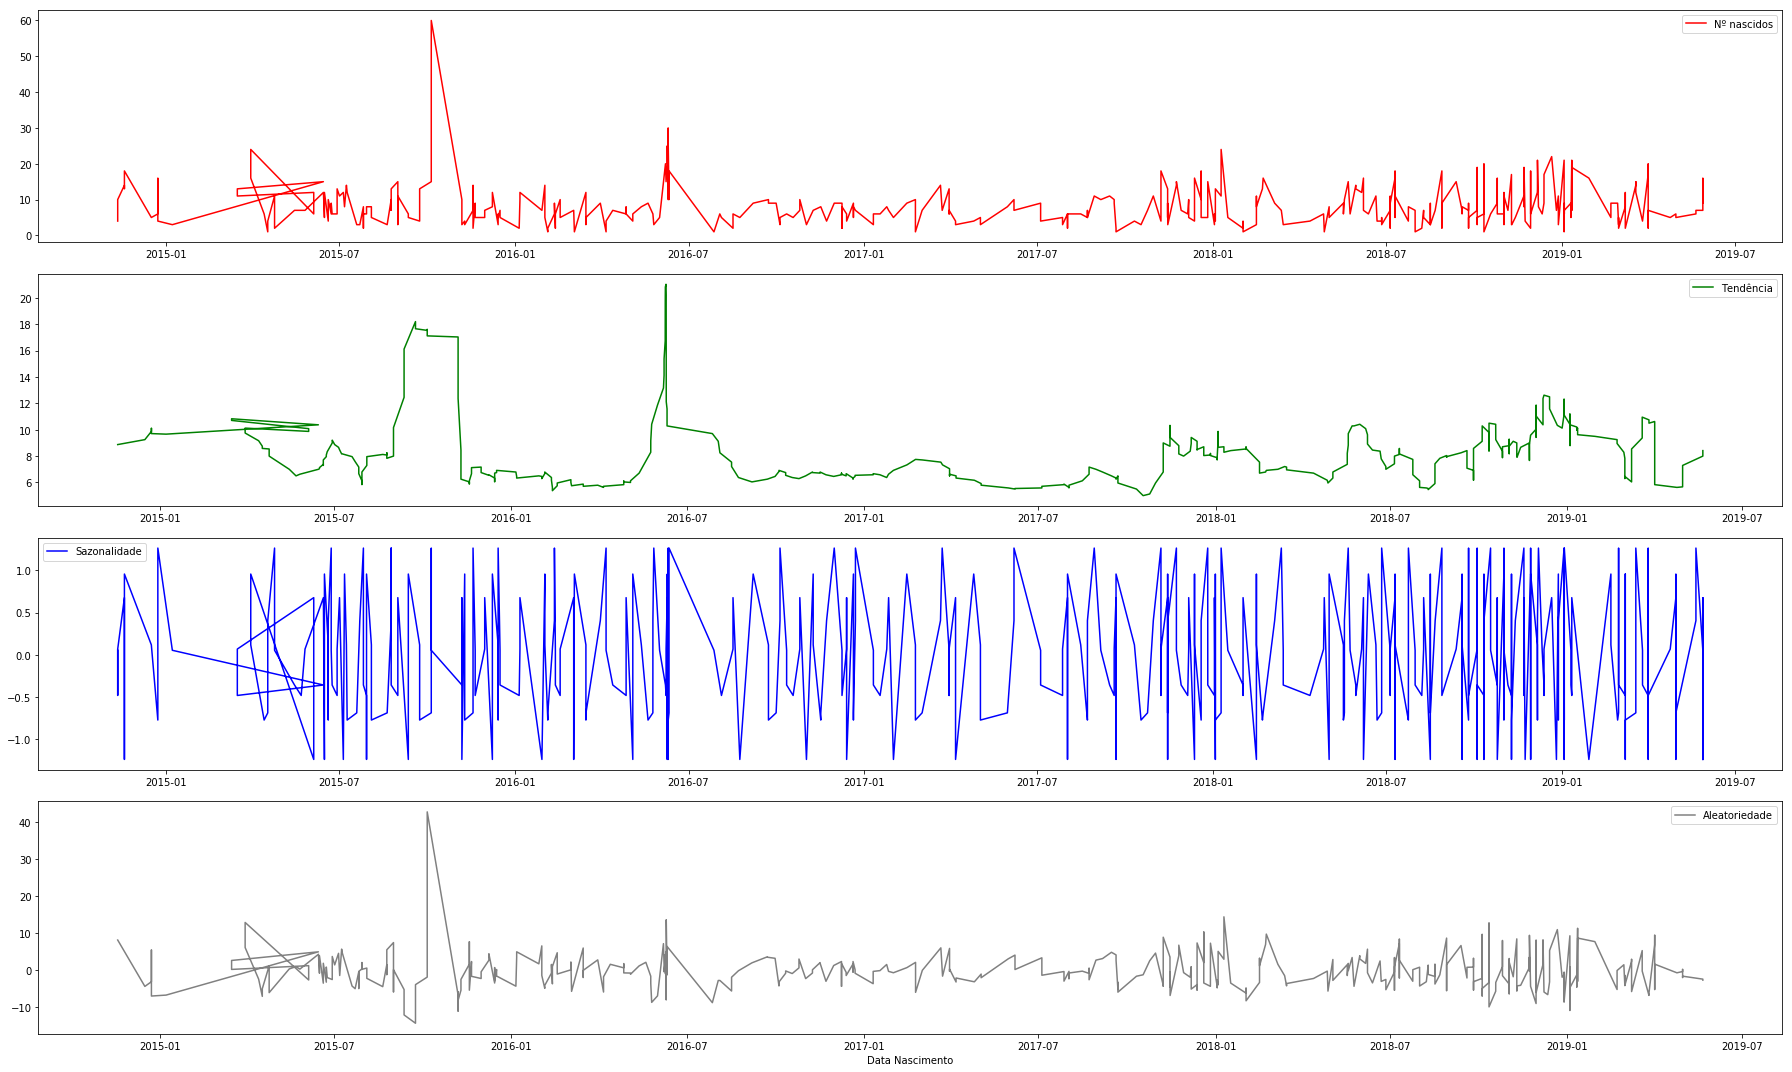

In [7]:
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6'
'DBA/1J', 'S129KO', 'Swiss-1 A', 'Swiss-1 B',
'Swiss-1 C, 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A
'Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E'
'''

#Filtrando a linhagem da coluna ling e plotando seu numero de nascidos

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']['num_nasc'] #'Swiss/CFW A'
decom = seasonal_decompose(ser_temp_ling, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Nº nascidos', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

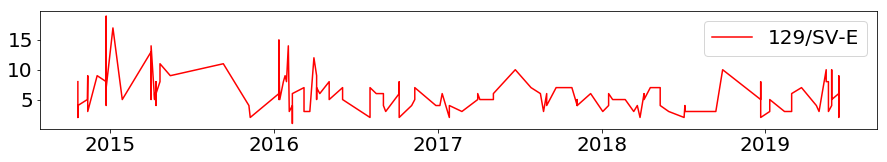

In [8]:
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6'
'DBA/1J', 'S129KO', 'Swiss-1 A', 'Swiss-1 B',
'Swiss-1 C, 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A
'Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E'
'''

#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem '129/SV-E'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == '129/SV-E']['num_nasc'] #'Swiss/CFW A'
#decom = seasonal_decompose(ser_temp_ling, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(15, 10))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = '129/SV-E', color='red')
plt.legend(loc = 'best')

RETIRANDO VALORES DISCREPANTES (OUTLIERS)

In [9]:
serie_temp_ling['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 E     47
Swiss-1 A     37
Swiss-1 B     32
Swiss-1 C     32
Swiss-1 D     31
Swiss-2 C     27
DBA/1J        24
Swiss-2 B     24
Swiss-2 E     21
Swiss-2 D     21
Swiss-2 A     21
AG129          9
Name: ling, dtype: int64

In [10]:
quartis = serie_temp_ling.groupby('ling')
quartis.describe()

num_nasc                                                   
             count       mean        std  min   25%   50%   75%   max
ling                                                                 
129/SV-E     149.0   6.073826   3.042701  1.0   4.0   6.0   8.0  19.0
AG129          9.0   4.777778   2.166667  1.0   4.0   5.0   6.0   8.0
Balb/c       498.0   8.612450   5.852342  1.0   5.0   7.0  11.0  60.0
C3H          102.0   5.911765   2.821779  1.0   4.0   6.0   7.0  15.0
C57BL/6      460.0   8.697826   5.178091  1.0   6.0   8.0  10.0  50.0
DBA/1J        24.0   9.583333   1.976309  3.0  10.0  10.0  10.0  13.0
S129KO       250.0   6.448000   4.234978  1.0   4.0   6.0   8.0  45.0
Swiss-1 A     37.0  10.918919   4.895454  4.0   8.0  11.0  13.0  30.0
Swiss-1 B     32.0  10.750000   4.087747  4.0   9.0  10.0  12.0  28.0
Swiss-1 C     32.0  12.906250  10.831136  3.0   8.0  10.0  14.0  60.0
Swiss-1 D     31.0  10.032258   2.983107  4.0   8.5  10.0  11.5  17.0
Swiss-1 E     47.0  11.297872   5.755583  2.0   8.0  10.0  12.0  34.0
Swiss-2 A     21.0  10.761905   3.176551  4.0   9.0  11.0  12.0  17.0
Swiss-2 B     24.0  10.500000   2.766256  2.0  10.0  10.5  12.0  16.0
Swiss-2 C     27.0   9.851852   2.444833  5.0   8.0  10.0  12.0  15.0
Swiss-2 D     21.0  11.857143   7.786435  2.0  10.0  10.0  12.0  44.0
Swiss-2 E     21.0   9.904762   1.700140  6.0   9.0  10.0  11.0  12.0

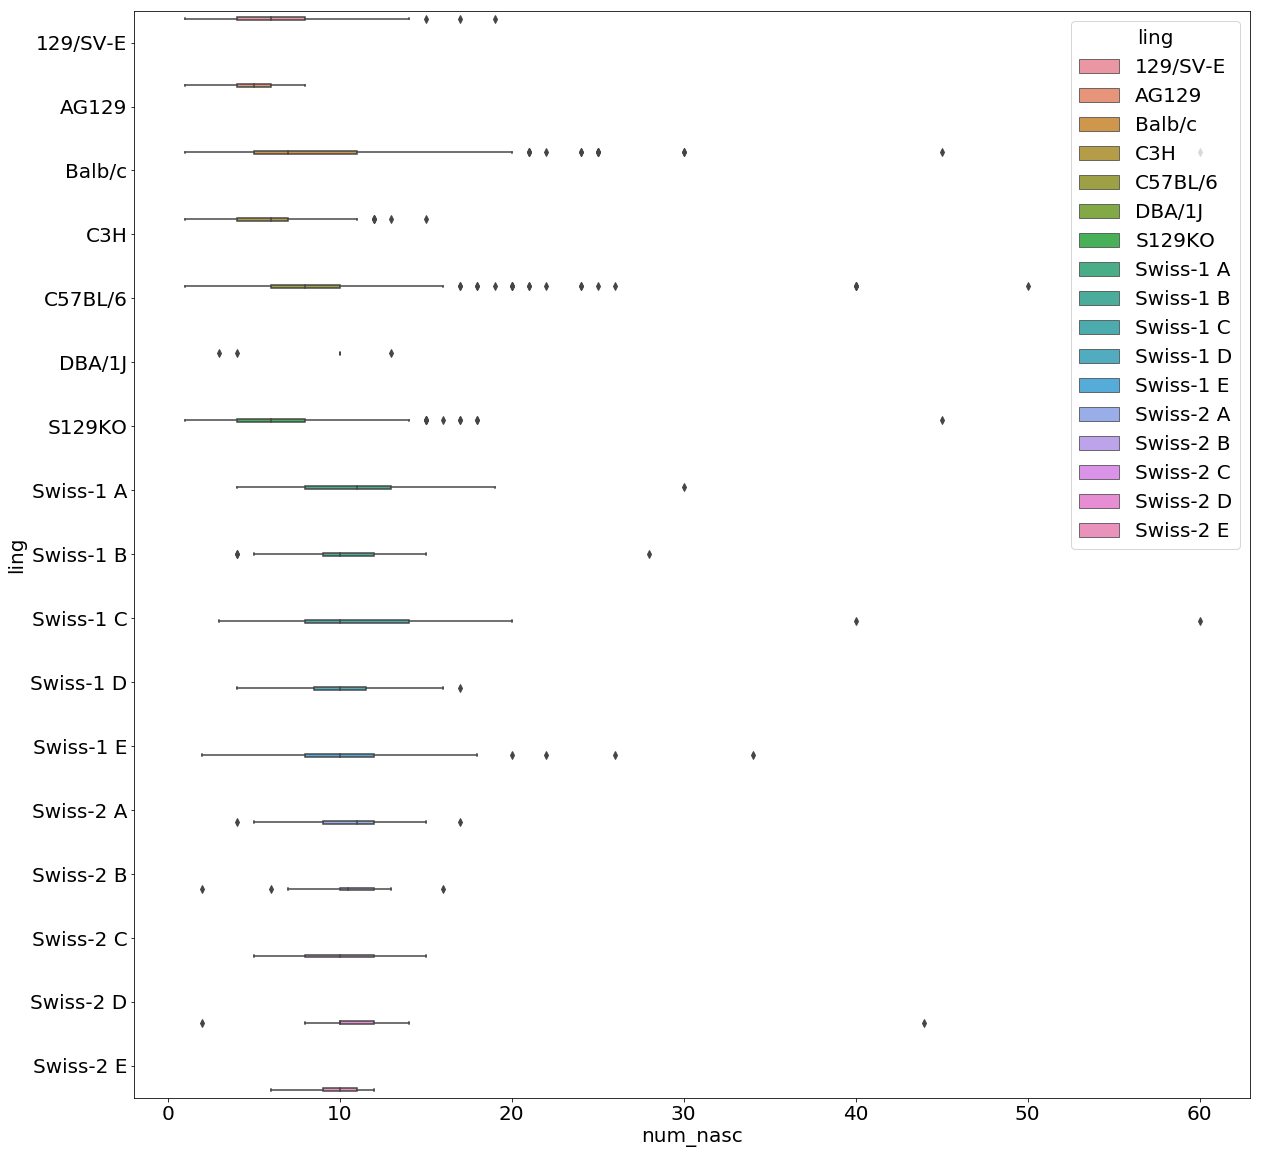

In [11]:
plt.figure(figsize=(20,20))
sns.boxplot(
    
    y='ling',
    x='num_nasc',
    hue='ling',
    data=serie_temp_ling.sort_values('ling')
)
plt.savefig(
    fname="../resultados/12_pergunta_outliers_por_linhagem.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

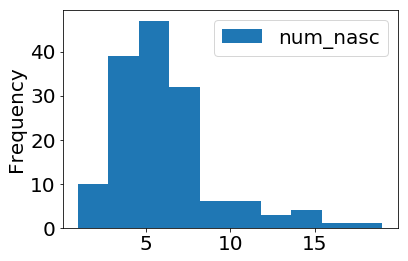

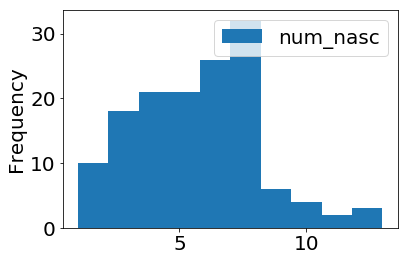

In [12]:
ling_test = '129/SV-E'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist'
)
serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist'
)
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_test.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

GRÁFICOS DE LINHAGENS ISOGÊNICAS

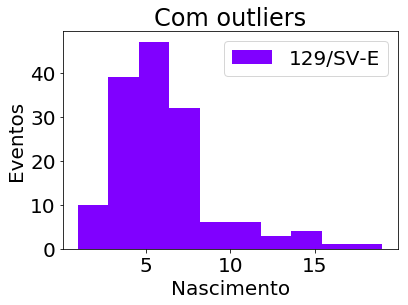

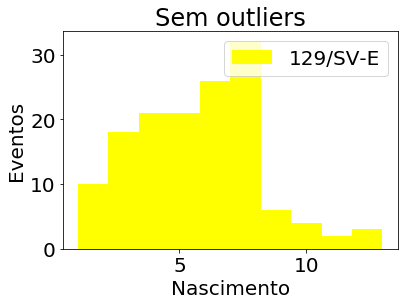

In [23]:
#Plotando gráfico com outliers

ling_test = '129/SV-E'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_129-SE-V.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_129-SE-V.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

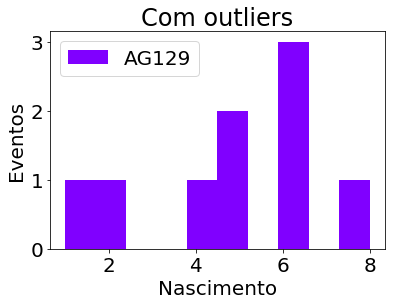

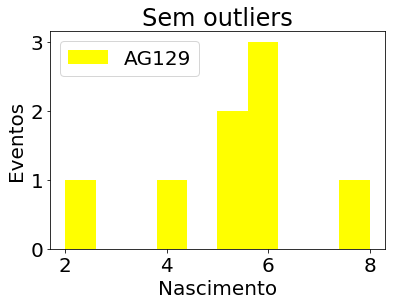

In [24]:
#['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO']

ling_test = 'AG129'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_AG129.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_AG129.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

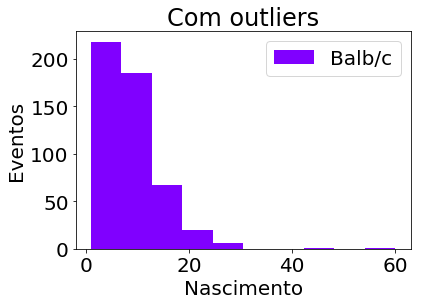

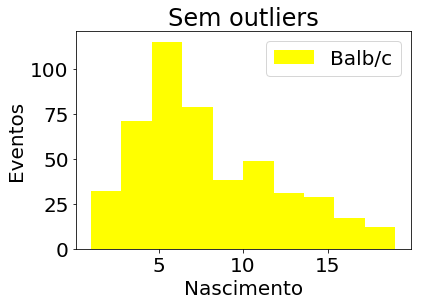

In [25]:
#['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO']

#Plotando gráfico com outliers
ling_test = 'Balb/c'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Balbc.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Balbc.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

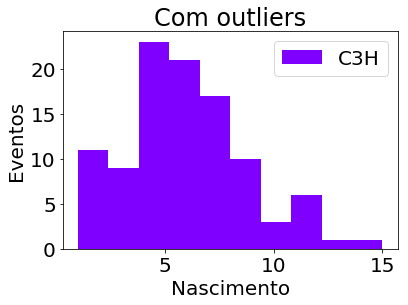

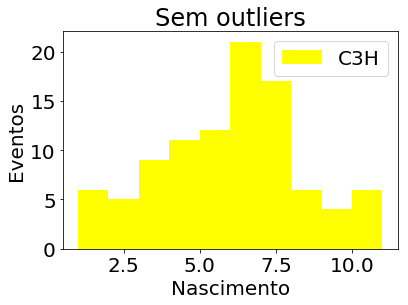

In [26]:
#['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO']

#Plotando gráfico com outliers
ling_test = 'C3H'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_C3H.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_C3H.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

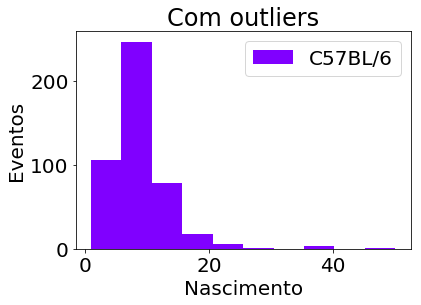

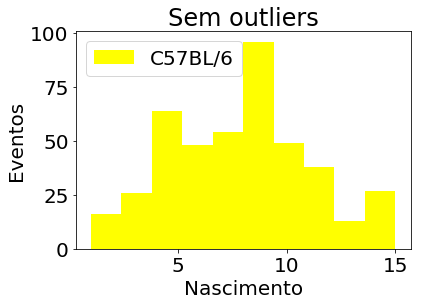

In [27]:
#['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO']

#Plotando gráfico com outliers
ling_test = 'C57BL/6'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_C57BL6.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_C57BL6.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

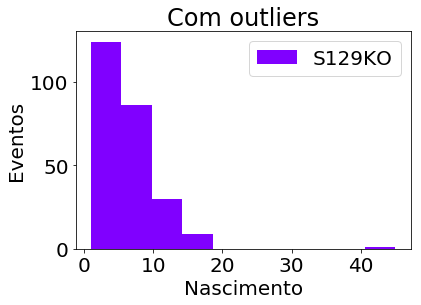

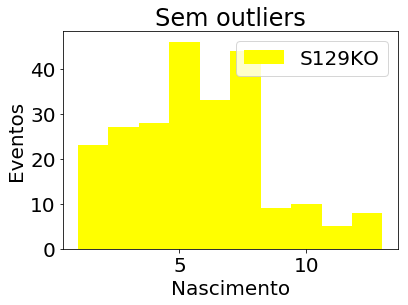

In [28]:
#['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6','DBA/1J', 'S129KO']

#Plotando gráfico com outliers
ling_test = 'S129KO'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_S129KO.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_S129KO.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

GRÁFICO PLOTANDO LINHAGENS HETEROGÊNICOS

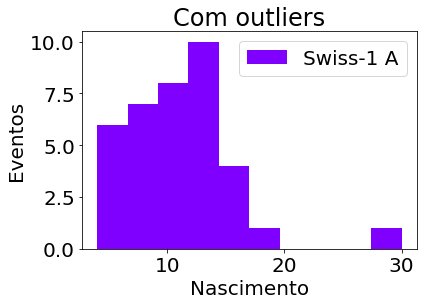

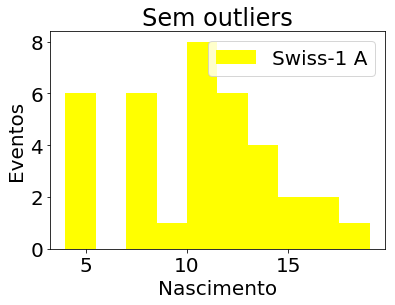

In [30]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-1 A'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-1 A.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-1 A.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

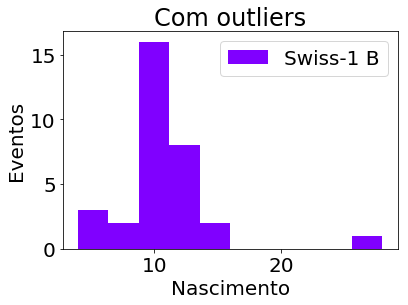

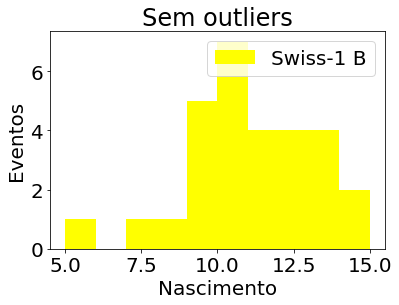

In [31]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-1 B'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-1 B.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-1 B.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

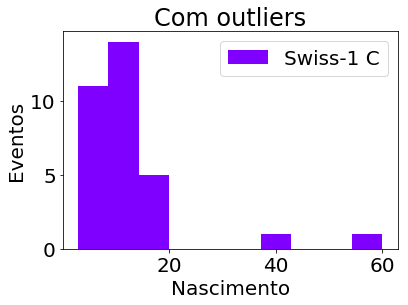

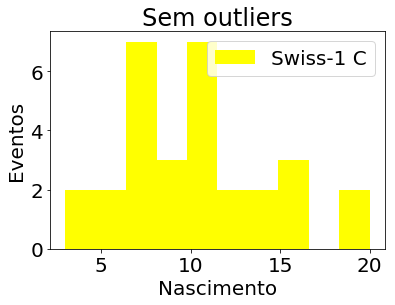

In [32]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-1 C'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-1 C.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-1 C.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

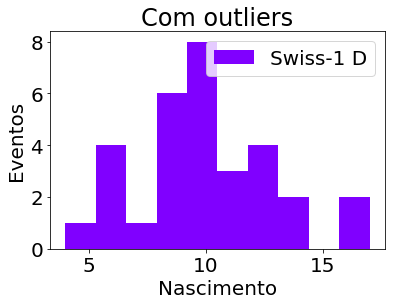

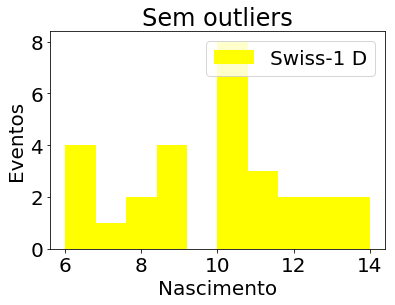

In [33]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-1 D'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-1 D.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-1 D.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

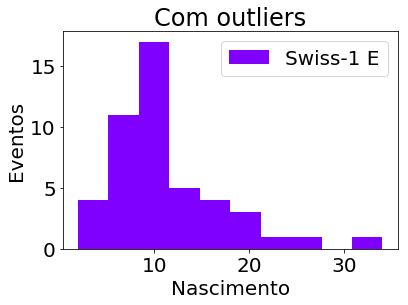

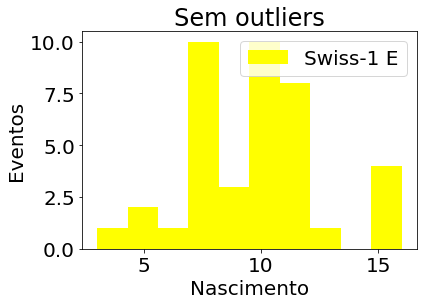

In [34]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-1 E'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-1 E.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-1 E.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

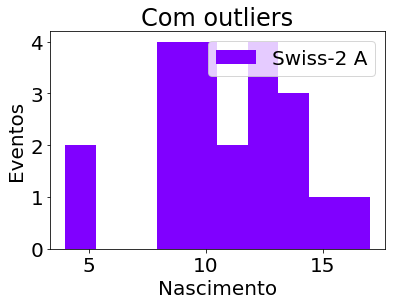

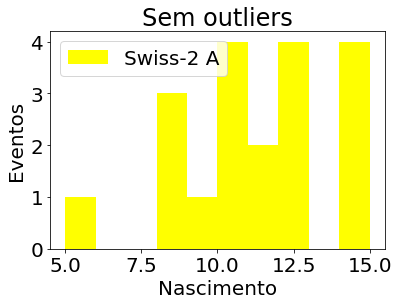

In [35]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-2 A'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-2 A.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-2 A.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [ ]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-2 B'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-2 B.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-2 B.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

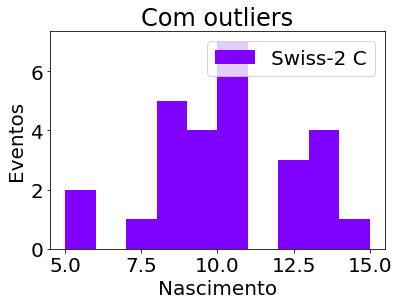

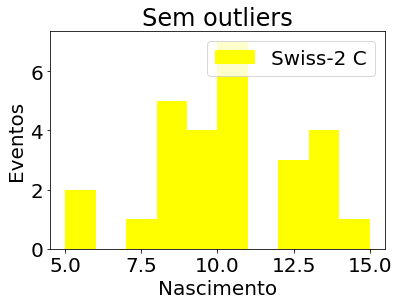

In [36]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-2 C'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-2 C.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-2 C.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

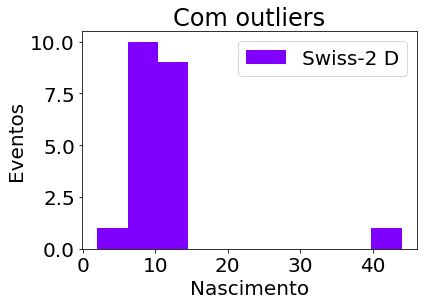

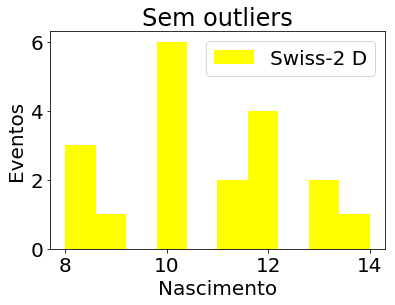

In [37]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-2 D'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-2 D.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-2 D.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

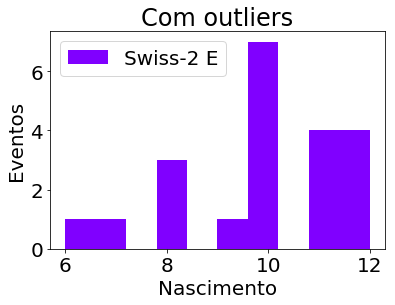

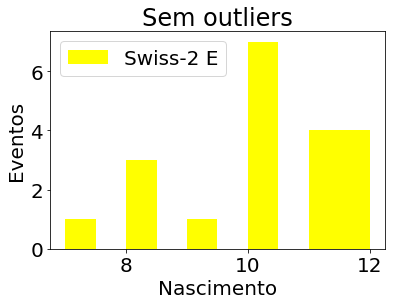

In [38]:
#'Swiss-1 A', 'Swiss-1 B','Swiss-1 C', 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A','Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E']
#Plotando gráfico com outliers

ling_test = 'Swiss-2 E'
q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp_ling[(serie_temp_ling['ling'] == ling_test)
].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_com_outliers_Swiss-2 E.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#Plotando gráfico sem outliers

serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
         (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
    kind='hist',
    color='yellow'
)
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
plt.savefig(
    fname="../resultados/12_pergunta_sem_outliers_Swiss-2 E.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [ ]:
ling_out = ['Swiss-1 A', 
        'Swiss-1 B',
        'Swiss-1 C', 
        'Swiss-1 D', 
        'Swiss-1 E', 
        'Swiss-2 A',
        'Swiss-2 B', 
        'Swiss-2 C', 
        'Swiss-2 D',
        'Swiss-2 E']
for o in ling_out:
    q1 = serie_temp_ling[serie_temp_ling['ling'] == ling_out]['num_nasc'].quantile(0.25)
    q3 = serie_temp_ling[serie_temp_ling['ling'] == ling_out]['num_nasc'].quantile(0.75)
    iqr = q3 - q1
    serie_temp_ling[(serie_temp_ling['ling'] == ling_out)].plot(
    kind='hist',
    colormap='rainbow',
)
plt.legend([ling_out])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
# #Plotando gráfico sem outliers

for coco in ling_out:
    serie_temp_ling[(serie_temp_ling['ling'] == ling_test) & 
          (serie_temp_ling['num_nasc'] > (q1 - 1.5 * iqr)) &
          (serie_temp_ling['num_nasc'] < (q3 + 1.5 * iqr))
].plot(
     kind='hist',
     color='yellow'
 )
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')

Resultados: Ao retirar os outliers de cada linhagem, o grupo Swiss (heterogênicos) apresenta uma média de 10 filhotes por nascimento, ocorrendo poucos casos com até no máximo 15 filhotes, concordando com o que é visto na rotina do biotério. Já as linhagens isogênicas possue uma média de 6 filhotes por evento de nascimento. Corraborando com a literatura, que linhagens isogênicas tende a produzir menos filhotes do que linhagens heterogênicos.

Isogênicos: 6.0 média de filhotes por evento de nascimento
Heterogênicos: 10.0 média de filhotes por evento de nascimento